<img src="https://static.wikia.nocookie.net/bttf/images/1/13/Almanacfront.jpg/revision/latest/scale-to-width-down/300?cb=20070110144009" width="250" align="left"/>
<font face = "Clarendon" size=6 color=""> 	Introduction</font>
<br/>
<font face = "Clarendon" size=5 color=""> 	
"See this book? It tells the future. It tells the outcome of every major sporting event through the end of the century... soccer, baseball, basketball, horse racing, boxing... the records in this book are worth millions. " That was the line of old Biff discussing the almanac with his younger self in 1955. Who wouldn't want to have a book like that?
<br/>
Well, have you ever thought about finding out the results of the Brazilian championship games? This notebook contains the code used to make game predictions seeking the highest possible number of correct results.</font>
<br/>






In [ ]:
# Libraries
import pandas as pd
import numpy as np

from google_drive_downloader import GoogleDriveDownloader as gdd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Loading CSV from Google Drive
# The file used was downloaded from the site www.football-data.co.uk, which aggregates information from several championships
# from around the world.
data_google_id = '1cexvKiMVcEbwrWJC4WS7kFVnn4_K5Hvq'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './BRA.csv', 
                                    showsize = True)

data=pd.read_csv('BRA.csv',delimiter=',')
# Removing some columns that are not relevant for the calculation
num_data = data.drop(['Country','League','Season','Date','Time','Home','Away','game_id','home_id','Away_id', 'AG','PD','PH'],1)
# Checking the first 5 lines of the file to be used 
display(num_data.head())

256.0 KiB Done.


,HG,Res,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1,0,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1,0,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2,1,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4,1,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0,2,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [ ]:
# Separate elements for training using logistic regression, where Y is the final answer, and X is everything except the answer
x = num_data.drop(['Res'],1)

y = data['Res']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

model = LogisticRegression(solver='lbfgs', max_iter=400).fit(x_train, y_train)

y_pred = model.predict(x_test)

print(x_train, x_test, y_train, y_test)

#HG = Home team goals
#PA = away team win probability provided by Pinacle (English bookmaker)
#MaxH = home team win probability provided by OddsPortal (English bookmaker)
#MaxD = draw probability provided by OddsPortal (English bookmaker)
#MaxA = away team win probability provided by OddsPortal (English bookmaker)
#AvgH = average home win probability provided by OddsPortal (English bookmaker)
#AvgD = average draw probability provided by OddsPortal (English bookmaker)
#AvgA = average probability of winning by the away team provided by OddsPortal (English bookmaker)

      HG     PA  MaxH  MaxD   MaxA  AvgH  AvgD   AvgA
123    0   2.57  3.15  3.34   2.57  2.95  3.18   2.33
831    0   2.09  3.90  3.47   2.25  3.54  3.22   2.07
394    0   5.72  1.75  3.85   6.00  1.68  3.53   5.03
1029   5   2.36  3.44  3.30   2.44  3.20  3.09   2.27
857    2   4.25  2.10  3.60   4.28  1.94  3.29   3.87
...   ..    ...   ...   ...    ...   ...   ...    ...
1638   0   3.55  2.32  3.40   3.70  2.17  3.20   3.37
1095   3   3.89  2.13  3.45   4.15  2.03  3.26   3.60
1130   2  16.65  1.25  6.70  17.00  1.21  5.84  13.28
1294   0   7.51  1.55  4.46   8.20  1.49  3.99   6.73
860    0   2.17  3.76  3.32   2.20  3.46  3.16   2.11

[1595 rows x 8 columns]       HG    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
408    3  3.13  2.44  3.50  3.20  2.29  3.23  3.02
1374   1  4.76  1.94  3.60  4.76  1.89  3.24  4.28
1901   3  3.83  2.01  3.75  4.33  1.92  3.43  3.90
1557   1  3.26  2.45  3.50  3.26  2.33  3.21  2.99
1430   2  7.47  1.51  5.00  7.90  1.46  4.29  6.61
...   ..   ...   ... 

In [ ]:
# Comparison of prediction versus response
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
408,1,1
1374,1,0
1901,1,1
1557,0,0
1430,1,1
...,...,...
601,2,0
175,1,1
1795,0,2
2000,0,0


In [ ]:
# Overall prediction success percentage
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Confusion matrix in array format
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.6242690058479532


array([[ 55,  53,  55],
       [ 64, 277,   5],
       [ 50,  30,  95]])

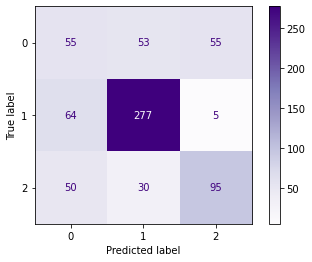

In [ ]:
# Confusion matrix in visual format
from sklearn.metrics import plot_confusion_matrix
_ = plot_confusion_matrix(model, x_test, y_test, cmap = 'Purples', values_format='.0f')

#0 = Tie
#1 = Home team wins
#2 = Away team wins

#We see, for example, that out of 360 home team win predictions (1), 277 are correct

